In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

from sklearn.neighbors import KNeighborsClassifier

In [33]:
df = pd.read_csv('final_data.csv')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [34]:
df.shape

(5052, 4)

In [35]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['label'])
one_hot_encoded_data[:] = one_hot_encoded_data[:].astype(int)
one_hot_encoded_data

,red,green,blue,label_Black,label_Blue,label_Brown,label_Green,label_Grey,label_Orange,label_Pink,label_Purple,label_Red,label_White,label_Yellow
0,20,139,240,0,1,0,0,0,0,0,0,0,0,0
1,174,83,72,0,0,1,0,0,0,0,0,0,0,0
2,144,249,131,0,0,0,1,0,0,0,0,0,0,0
3,168,25,156,0,0,0,0,0,0,1,0,0,0,0
4,30,182,136,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,26,26,26,1,0,0,0,0,0,0,0,0,0,0
5048,27,27,27,1,0,0,0,0,0,0,0,0,0,0
5049,28,28,28,1,0,0,0,0,0,0,0,0,0,0
5050,29,29,29,1,0,0,0,0,0,0,0,0,0,0


In [36]:
y_data = pd.DataFrame([one_hot_encoded_data.pop(x) for x in ['label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']])
y_data = y_data.T
x_data = one_hot_encoded_data

In [37]:
clf = DecisionTreeClassifier(random_state=42)
kf = KFold(n_splits=10)

In [58]:
decision_tree_scores = cross_val_score(clf, x_data, y_data, cv = kf)
decision_tree_scores

array([0.80434783, 0.83201581, 0.83366337, 0.81584158, 0.81584158,
       0.81782178, 0.79207921, 0.7980198 , 0.81386139, 0.76039604])

In [59]:
decision_tree_scores.mean()

np.float64(0.8083888388838885)

In [39]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

In [65]:
rf = RandomForestClassifier()
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)
rf.fit(x_train, y_train)
y_pred_random_forest = rf.predict(x_test)

In [66]:
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)
rand_search.fit(x_train, y_train)
best_rf = rand_search.best_estimator_
rand_search.best_params_

{'max_depth': 14, 'n_estimators': 266}

In [74]:
accuracy = accuracy_score(y_test, y_pred_random_forest)
accuracy

0.8308605341246291

In [63]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=x_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

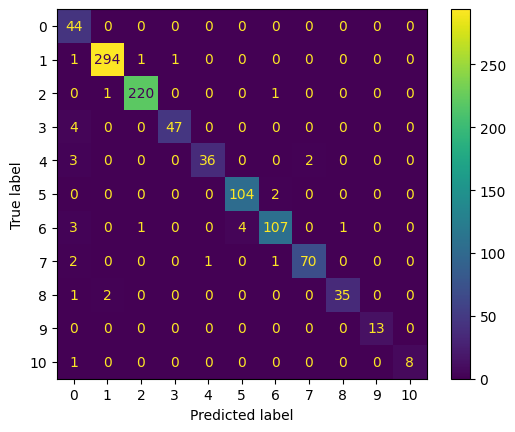

In [94]:
y_pred_random_forest_best_model = best_rf.predict(x_test)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [95]:
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest_best_model)
precision_random_forest = precision_score(y_test, y_pred_random_forest_best_model, pos_label='positive', average='micro')
recall_random_forest = recall_score(y_test, y_pred_random_forest_best_model, pos_label='positive', average='micro')
accuracy_random_forest, precision_random_forest, recall_random_forest

/mnt/h/Alex Eagles/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1583: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/mnt/h/Alex Eagles/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1583: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


(0.8417408506429278,
 np.float64(0.911134903640257),
 np.float64(0.8417408506429278))

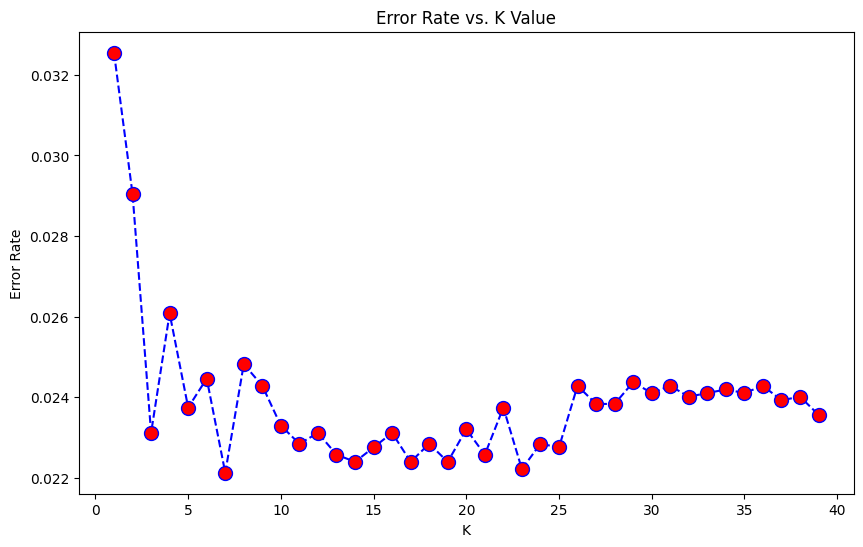

In [101]:
error_rate = []
 
# Will take some time
for i in range(1, 40):
 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
 
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue',
         linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
 
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [105]:
error_rate.lowest()
knn_best = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
pred_best = knn.predict(x_test)
np.mean(pred_best != y_test)

np.float64(0.023559032461109613)

In [113]:
k_best_indices = np.argsort(error_rate)[:]
k_best_indices

array([ 6, 22, 16, 13, 18, 20, 12, 14, 24, 10, 23, 17, 15,  2, 11, 19,  9,
       38,  4, 21, 27, 26, 36, 31, 37, 32, 29, 34, 33, 25, 30,  8, 35, 28,
        5,  7,  3,  1,  0])

In [114]:
k_best_value = k_best_indices[0] + 1
k_best_value

np.int64(7)